# Neurons And Layers Lab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [2]:
!cp /content/drive/MyDrive/Datasets/lab_neurons_utils.py /content

In [3]:
!cp /content/drive/MyDrive/Datasets/lab_utils_common.py /content

In [4]:
!cp /content/drive/MyDrive/Datasets/deeplearning.mplstyle /content

## Packages
**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Neuron without activation - Regression/Linear Model

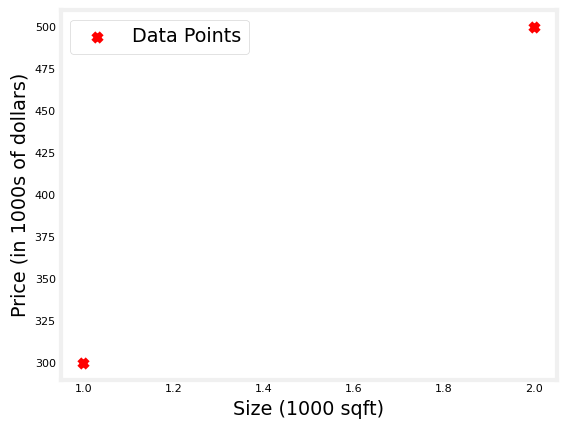

In [8]:
# Using dataset of house prices
X_train = np.array([[1.0], [2.0]], dtype=np.float32) #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)#(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of Dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

### Regression/Linear Model
The function implemented by a neuron with no activation is the same as linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [9]:
linear_layer = tf.keras.layers.Dense(units = 1, activation = 'linear',)

In [10]:
#Examining the weights
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated.<br>
Now we try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [11]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-0.12]], shape=(1, 1), dtype=float32)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry.   
Now we look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [12]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b={b}")#randomly assigning w and b

w = [[-0.12]], b=[0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.   

The weights are initialized to random values so now we set them to some known values.

In [13]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])#assigning weights and biases
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


**Comparing equation (1) to the layer output.**

In [14]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


## Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$

Let's set $w$ and $b$ to some known values and check the model.


In [15]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

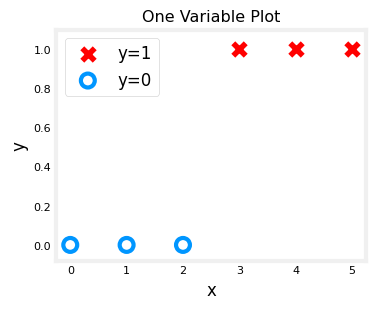

In [19]:
"""
Here we creates a boolean array called pos.
It stores True for  elements in the Y_train array where the value equals 1, and False otherwise.
This filters out data points where the target label 'y' is 1.
"""
pos = Y_train == 1
neg = Y_train == 0

#creating a figure (fig) and an axis object (ax).
# The subplots function from the matplotlib.pyplot library allows us to organize plots.
#(1, 1) means making a grid with 1 row and 1 column,
#and figsize sets the size of the figure to 4 inches wide by 3 inches tall.
fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")#marker size 80
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)#Setting the limits of the y-axis.
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('One Variable Plot')
ax.legend(fontsize=12)
plt.show()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is described above.   

Noq we will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [20]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.65]] [0.]
(1, 1) (1,)


Now we set the weight and bias to some known values.

In [23]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


Comparing equation (2) to the layer output

In [25]:
"""
Assumes we have a previously trained machine learning model (the variable model).
The predict function generates a prediction based on the input data.

X_train[0].reshape(1,1) takes the first data sample (X_train[0]) from our training dataset (X_train).
The reshape(1,1) transforms it into a 2-dimensional array with a single row and single column
(essentially a 1x1 matrix). This is likely done to match the expected input shape of our model.
"""
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

"""
X_train[0].reshape(1,1) takes the first data sample (X_train[0]) from our training dataset (X_train).
The reshape(1,1) transforms it into a 2-dimensional array with a single row and single column
(essentially a 1x1 matrix). This is likely done to match the expected input shape of our model.

sigmoidnp function applies the sigmoid activation function to the calculated value and stores in alog
"""
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 37ms/step
[[0.01]]
[[0.01]]


As we can see they produce the same values. <br>
Now, we can use our logistic layer and NumPy model to make predictions on our training data.

1/1 [==============================] - 0s 25ms/step


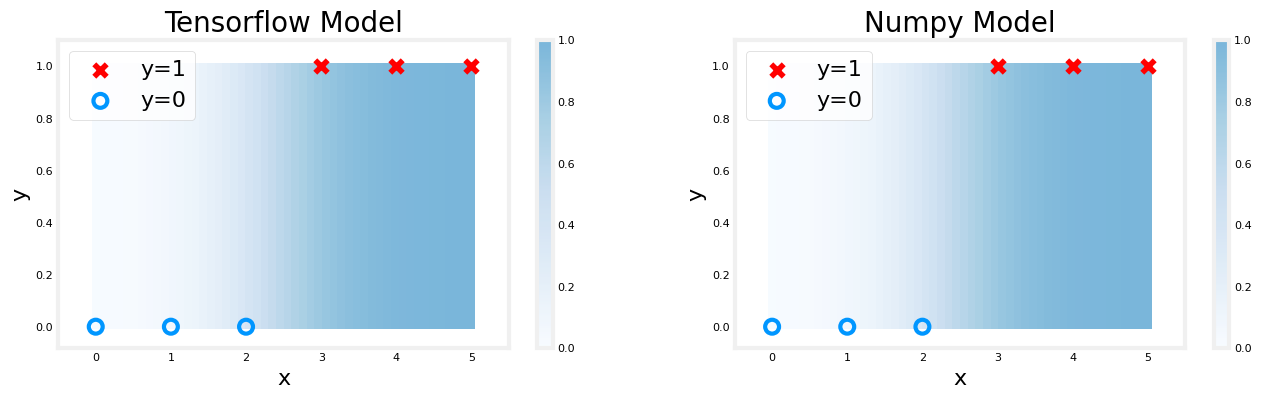

In [26]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)